In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
life_data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
life_data.isnull().sum().sort_values()

Country                              0
Year                                 0
Status                               0
infant deaths                        0
percentage expenditure               0
Measles                              0
 HIV/AIDS                            0
under-five deaths                    0
Life expectancy                     10
Adult Mortality                     10
Polio                               19
Diphtheria                          19
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
GDP                                448
Hepatitis B                        553
Population                         652
dtype: int64

<AxesSubplot:xlabel='Life expectancy ', ylabel='Status'>

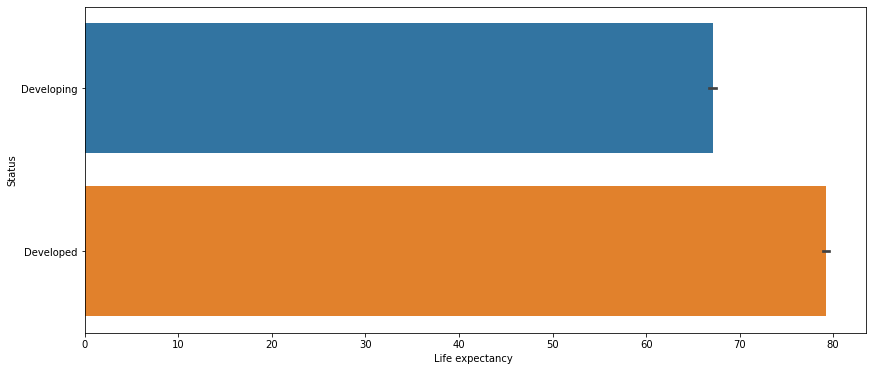

In [5]:
# life expexctancy compared with country status
plt.figure(figsize=(14,6))
sns.barplot(x=life_data['Life expectancy '], y=life_data.Status)

In [6]:
columns = list(life_data.columns)
null_col = []
for column in columns:
    sum_of_null = life_data[column].isnull().sum()
    null_col.append(sum_of_null)
null_df = pd.DataFrame({'Feature name':columns,'No. of Null Values':null_col})
null_df

,Feature name,No. of Null Values
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


In [7]:
def fill_with_mean(column, dataset=life_data):
  dataset[column].fillna(dataset[column].mean(), inplace=True)

In [8]:
under_40 = life_data.columns[(life_data.isnull().sum() < 40) & (life_data.isnull().sum() > 0)]
for column in under_40:
  fill_with_mean(column)

In [9]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
 HIV/AIDS                            0
Diphtheria                           0
Polio                                0
under-five deaths                    0
Measles                              0
 BMI                                 0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Life expectancy                      0
Status                               0
Year                                 0
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
GDP                                448
Hepatitis B                        553
Population                         652
dtype: int64

Text(0.5, 1.0, 'with outliers')

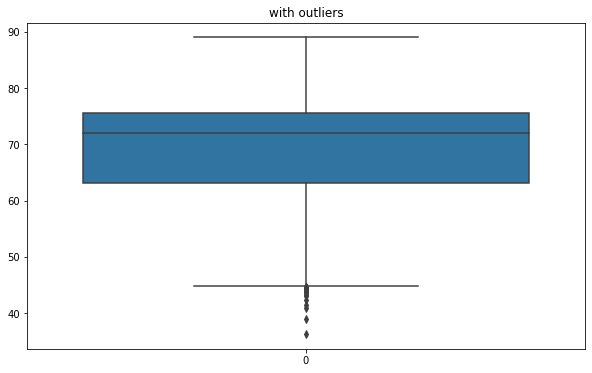

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=life_data['Life expectancy '])
plt.title('with outliers')

In [11]:
print(" Pre Outliers Shape: ", life_data.shape) # shows 1649 observations

Q1 = life_data.quantile(0.25) # defines 25th %ile
print(Q1["Life expectancy "])
Q3 = life_data.quantile(0.75) # defines 75th %ile
print(Q3["Life expectancy "])
IQR = Q3 - Q1 # defines interquartile range
Upper = Q3 + 1.5*IQR # defines upper limit for outliers
Lower = Q1 - 1.5*IQR # defines lower limit for outliers

print("UPPER LIMIT", Upper["Life expectancy "]) # shows the value of upper limit so that we can use it
print ("LOWER LIMIT", Lower["Life expectancy "]) # shows the value of the lower limit so that we can use it

outlier = life_data[(life_data['Life expectancy '] >= 94)|(life_data['Life expectancy '] <= 45)].index # identifies the outlier values

life_data.drop(outlier, inplace=True) # drops the outliers

print("After Outliers Shape: ", life_data.shape) 


 Pre Outliers Shape:  (2938, 22)
63.2
75.6
UPPER LIMIT 94.19999999999999
LOWER LIMIT 44.600000000000016
After Outliers Shape:  (2919, 22)


Text(0.5, 1.0, 'without outliers')

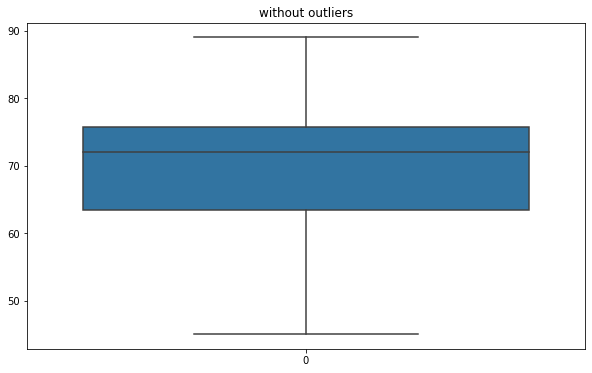

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=life_data['Life expectancy '])
plt.title('without outliers')

In [13]:
lifeExpectancy = life_data.pop('Life expectancy ')
lifeExpectancy.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

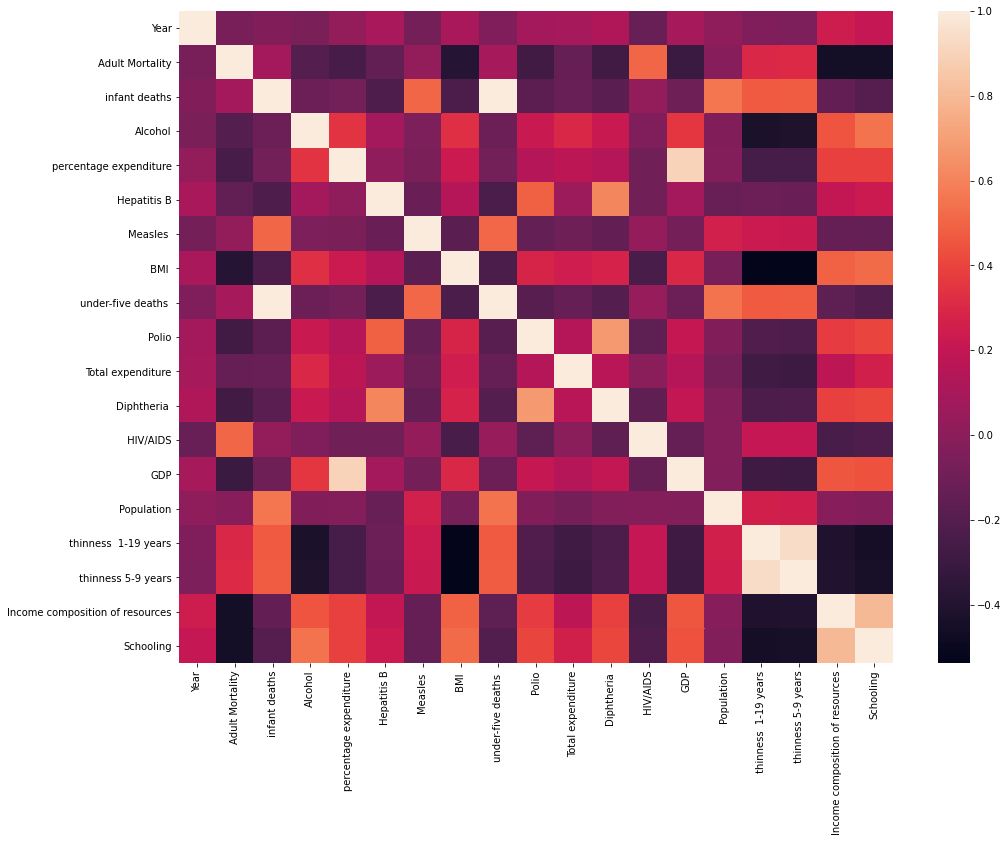

In [14]:
corr_data = life_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_data);

Use features correlation to impute missing values 

In [15]:
corr_data['Population'].sort_values(ascending=False)[:2]

Population       1.000000
infant deaths    0.556829
Name: Population, dtype: float64

<AxesSubplot:xlabel='infant deaths', ylabel='Population'>

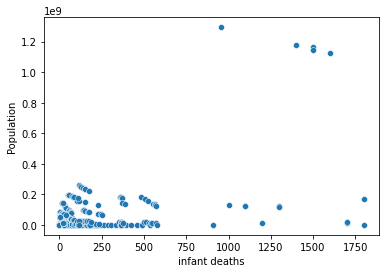

In [16]:
sns.scatterplot(x=life_data['infant deaths'],y=life_data['Population'])

In [17]:
val_list = []
val_list.append(life_data[life_data['infant deaths'] <= 250]['Population'].mean())
val_list.append(life_data[(250 < life_data['infant deaths']) & (life_data['infant deaths'] <= 750)]['Population'].mean())
val_list.append(life_data[(750 < life_data['infant deaths']) & (life_data['infant deaths'] <= 1400)]['Population'].mean())
val_list.append(life_data[(1400 < life_data['infant deaths']) & (life_data['infant deaths'] <= 1600)]['Population'].mean())
val_list.append(life_data[life_data['infant deaths'] > 1600]['Population'].mean())

val_list

[9049586.334287006,
 54981415.85714286,
 345269128.6666667,
 1144077390.0,
 50957181.75]

In [19]:
def impute_pop(col):
    p = col[0]
    i = col[1]
    if pd.isnull(p):
        if i <= 250:
            return val_list[0]
        elif 250 < i <= 750:
            return val_list[1]
        elif 750 < i <= 1400:
            return val_list[2]
        elif 1400 < i <= 1600:
            return val_list[3]
        elif i > 1600:
            return val_list[4]
        
    else:
        return p
    
life_data['Population'] = life_data[['Population', 'infant deaths']].apply(impute_pop, axis=1)
#data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

In [20]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
Population                           0
 HIV/AIDS                            0
Diphtheria                           0
Polio                                0
 BMI                                 0
under-five deaths                    0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
Measles                              0
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
GDP                                448
Hepatitis B                        542
dtype: int64

In [21]:
corr_data['GDP'].sort_values(ascending=False)[:2]

GDP                       1.000000
percentage expenditure    0.899258
Name: GDP, dtype: float64

<AxesSubplot:xlabel='percentage expenditure', ylabel='GDP'>

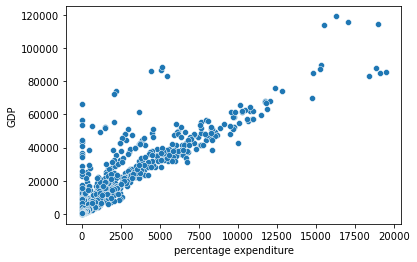

In [22]:
sns.scatterplot(x=life_data['percentage expenditure'],y=life_data['GDP'])

In [ ]:
val_list = []
val_list.append(life_data[life_data['percentage expenditure'] <= 2500]['GDP'].mean())
val_list.append(life_data[(2500 < life_data['percentage expenditure']) & (life_data['percentage expenditure'] <= 7500)]['GDP'].mean())
val_list.append(life_data[(7500 < life_data['percentage expenditure']) & (life_data['percentage expenditure'] <= 15000)]['GDP'].mean())
val_list.append(life_data[life_data['percentage expenditure'] > 15000]['GDP'].mean())

val_list

In [24]:
def impute_gdp(col):
    gdp = col[0]
    pe = col[1]
    if pd.isnull(gdp):
        if pe <= 2500:
            return val_list[0]
        elif 2500 < pe <= 7500:
            return val_list[1]
        elif 7500 < i <= 15000:
            return val_list[2]
        elif i > 15000:
            return val_list[3]
        
    else:
        return gdp
    
life_data['GDP'] = life_data[['GDP', 'percentage expenditure']].apply(impute_gdp, axis=1)


In [25]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
Population                           0
GDP                                  0
 HIV/AIDS                            0
Diphtheria                           0
Polio                                0
 BMI                                 0
under-five deaths                    0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
Measles                              0
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
Hepatitis B                        542
dtype: int64

In [26]:
corr_data['Hepatitis B'].sort_values(ascending=False)[:2]

Hepatitis B    1.00000
Diphtheria     0.60976
Name: Hepatitis B, dtype: float64

<AxesSubplot:xlabel='Diphtheria ', ylabel='Hepatitis B'>

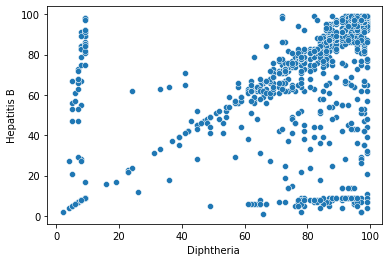

In [27]:
sns.scatterplot(x=life_data['Diphtheria '],y=life_data['Hepatitis B'])

In [28]:
val_list = []
val_list.append(life_data[life_data['Diphtheria '] <= 20]['Hepatitis B'].mean())
val_list.append(life_data[(20 < life_data['Diphtheria ']) & (life_data['Diphtheria '] <= 60)]['Hepatitis B'].mean())
val_list.append(life_data[(60 < life_data['Diphtheria ']) & (life_data['Diphtheria '] <= 80)]['Hepatitis B'].mean())
val_list.append(life_data[life_data['Diphtheria '] > 80]['Hepatitis B'].mean())

val_list

[36.479674796747965, 45.303030303030305, 63.759643916913944, 88.39816315505132]

In [29]:
def impute_hepatitis(col):
    hep = col[0]
    dp = col[1]
    if pd.isnull(hep):
        if dp <= 20:
            return val_list[0]
        elif 20 < dp <= 60:
            return val_list[1]
        elif 60 < dp <= 80:
            return val_list[2]
        elif dp > 80:
            return val_list[3]
        
    else:
        return hep
    
life_data['Hepatitis B'] = life_data[['Hepatitis B', 'Diphtheria ']].apply(impute_hepatitis, axis=1)

In [30]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
Population                           0
GDP                                  0
 HIV/AIDS                            0
Diphtheria                           0
Polio                                0
 BMI                                 0
under-five deaths                    0
Hepatitis B                          0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
Measles                              0
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
dtype: int64

In [31]:
corr_data['Alcohol'].sort_values(ascending=False)[:3]

Alcohol                            1.000000
Schooling                          0.548217
Income composition of resources    0.449940
Name: Alcohol, dtype: float64

<AxesSubplot:xlabel='Schooling', ylabel='Alcohol'>

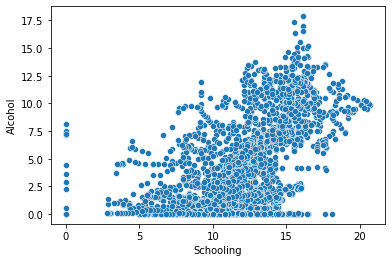

In [32]:
sns.scatterplot(x=life_data['Schooling'],y=life_data['Alcohol'])

In [33]:
val_list = []
val_list.append(life_data[life_data['Schooling'] <= 2.5]['Alcohol'].mean())
val_list.append(life_data[(2.5 < life_data['Schooling']) & (life_data['Schooling'] <= 7.5)]['Alcohol'].mean())
val_list.append(life_data[(7.5 < life_data['Schooling']) & (life_data['Schooling'] <= 16)]['Alcohol'].mean())
val_list.append(life_data[life_data['Schooling'] > 16]['Alcohol'].mean())

val_list

[3.433529411764705, 1.3492660550458704, 4.284323809523827, 9.655932203389833]

In [34]:
def impute_alcohol(col):
    alc = col[0]
    sc = col[1]
    if pd.isnull(alc):
        if sc <= 2.5:
            return val_list[0]
        elif 2.5 < sc <= 7.5:
            return val_list[1]
        elif 7.5 < sc <= 16:
            return val_list[2]
        elif sc > 16:
            return val_list[3]
        
    else:
        return alc
    
life_data['Alcohol'] = life_data[['Alcohol', 'Schooling']].apply(impute_alcohol, axis=1)

In [35]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
Population                           0
GDP                                  0
 HIV/AIDS                            0
Diphtheria                           0
Polio                                0
 BMI                                 0
under-five deaths                    0
Hepatitis B                          0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
Measles                              0
Alcohol                              9
Schooling                          163
Income composition of resources    167
Total expenditure                  226
dtype: int64

In [36]:
life_data['Alcohol'] = life_data['Alcohol'].fillna(value=life_data['Alcohol'].mean())

In [37]:
life_data['Alcohol'].isnull().sum()

0

In [38]:
corr_data['Total expenditure'].sort_values(ascending=False)[:3]

Total expenditure    1.000000
Alcohol              0.300043
Schooling            0.257073
Name: Total expenditure, dtype: float64

<AxesSubplot:xlabel='Alcohol', ylabel='Total expenditure'>

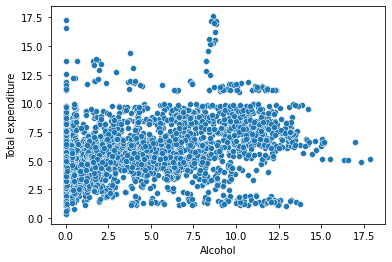

In [39]:
sns.scatterplot(x=life_data['Alcohol'],y=life_data['Total expenditure'])

In [40]:
val_list = []
val_list.append(life_data[life_data['Alcohol'] <= 2.5]['Total expenditure'].mean())
val_list.append(life_data[(2.5 < life_data['Alcohol']) & (life_data['Alcohol'] <= 7.5)]['Total expenditure'].mean())
val_list.append(life_data[(7.5 < life_data['Alcohol']) & (life_data['Alcohol'] <= 10)]['Total expenditure'].mean())
val_list.append(life_data[(10 < life_data['Alcohol']) & (life_data['Alcohol'] <= 15)]['Total expenditure'].mean())
val_list.append(life_data[life_data['Alcohol'] > 15]['Total expenditure'].mean())

val_list

[5.0828494623655835,
 6.1197202797202666,
 7.15888252148997,
 6.880167130919221,
 5.8136363636363635]

In [41]:
def impute_expenditure(col):
    te = col[0]
    alc = col[1]
    if pd.isnull(te):
        if alc <= 2.5:
            return val_list[0]
        elif 2.5 < alc <= 7.5:
            return val_list[1]
        elif 7.5 < alc <= 10:
            return val_list[2]
        elif 10 < alc <= 15:
            return val_list[3]
        elif alc > 15:
            return val_list[4]
        
    else:
        return te
    
life_data['Total expenditure'] = life_data[['Total expenditure', 'Alcohol']].apply(impute_expenditure, axis=1)

In [42]:
life_data['Total expenditure'].isnull().sum()

0

In [43]:
corr_data['Schooling'].sort_values(ascending=False)[:3]

Schooling                          1.000000
Income composition of resources    0.799056
Alcohol                            0.548217
Name: Schooling, dtype: float64

In [44]:
life_data[life_data['Schooling'].isnull()]['Income composition of resources']

432    NaN
433    NaN
434    NaN
435    NaN
436    NaN
        ..
2805   NaN
2806   NaN
2807   NaN
2808   NaN
2809   NaN
Name: Income composition of resources, Length: 163, dtype: float64

In [45]:
# schooling and income are missing the same data so i cant use one to impute the other
corr_data['Income composition of resources'].sort_values(ascending=False)[:4]

Income composition of resources    1.000000
Schooling                          0.799056
 BMI                               0.494852
GDP                                0.458760
Name: Income composition of resources, dtype: float64

<AxesSubplot:xlabel=' BMI ', ylabel='Income composition of resources'>

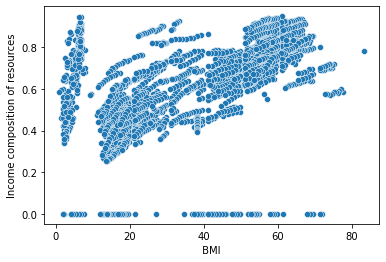

In [47]:
sns.scatterplot(x=life_data[' BMI '],y=life_data['Income composition of resources'])

In [48]:
val_list = []
val_list.append(life_data[life_data[' BMI '] <= 10]['Income composition of resources'].mean())
val_list.append(life_data[(10 < life_data[' BMI ']) & (life_data[' BMI '] <= 30)]['Income composition of resources'].mean())
val_list.append(life_data[(30 < life_data[' BMI ']) & (life_data[' BMI '] <= 50)]['Income composition of resources'].mean())
val_list.append(life_data[(50 < life_data[' BMI ']) & (life_data[' BMI '] <= 70)]['Income composition of resources'].mean())
val_list.append(life_data[life_data[' BMI '] > 70]['Income composition of resources'].mean())

val_list

[0.6340725190839698,
 0.47100501253132865,
 0.5830695364238418,
 0.7739319470699435,
 0.6216666666666667]

In [49]:
def impute_income(col):
    inc = col[0]
    bmi = col[1]
    if pd.isnull(inc):
        if bmi <= 10:
            return val_list[0]
        elif 10 < bmi <= 30:
            return val_list[1]
        elif 30 < bmi <= 50:
            return val_list[2]
        elif 50 < bmi <= 70:
            return val_list[3]
        elif bmi > 70:
            return val_list[4]
        
    else:
        return inc
    
life_data['Income composition of resources'] = life_data[['Income composition of resources', ' BMI ']].apply(impute_income, axis=1)

In [50]:
life_data.isnull().sum().sort_values()

Country                              0
 thinness 5-9 years                  0
 thinness  1-19 years                0
Population                           0
GDP                                  0
 HIV/AIDS                            0
Diphtheria                           0
Total expenditure                    0
Polio                                0
Income composition of resources      0
under-five deaths                    0
Measles                              0
Hepatitis B                          0
percentage expenditure               0
Alcohol                              0
infant deaths                        0
Adult Mortality                      0
Status                               0
Year                                 0
 BMI                                 0
Schooling                          163
dtype: int64

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

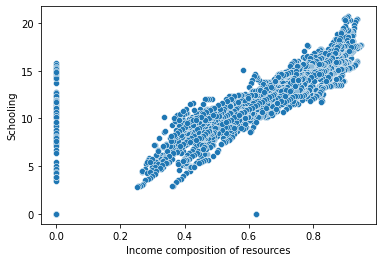

In [51]:
sns.scatterplot(x=life_data['Income composition of resources'],y=life_data['Schooling'])

In [52]:
val_list = []
val_list.append(life_data[life_data['Income composition of resources'] <= 0.2]['Schooling'].mean())
val_list.append(life_data[(0.2 < life_data['Income composition of resources']) & (life_data['Income composition of resources'] <= 0.4)]['Schooling'].mean())
val_list.append(life_data[(0.4 < life_data['Income composition of resources']) & (life_data['Income composition of resources'] <= 0.6)]['Schooling'].mean())
val_list.append(life_data[(0.6 < life_data['Income composition of resources']) & (life_data['Income composition of resources'] <= 0.8)]['Schooling'].mean())
val_list.append(life_data[life_data['Income composition of resources'] > 0.8]['Schooling'].mean())

val_list

[8.10230769230769,
 6.629885057471262,
 9.373478260869572,
 12.939241549876336,
 15.913843351548257]

In [53]:
def impute_schooling(col):
    sc = col[0]
    inc = col[1]
    if pd.isnull(sc):
        if inc <= 0.2:
            return val_list[0]
        elif 0.2 < inc <= 0.4:
            return val_list[1]
        elif 0.4 < inc <= 0.6:
            return val_list[2]
        elif 0.6 < inc <= 0.8:
            return val_list[3]
        elif inc > 0.8:
            return val_list[4]
        
    else:
        return sc
    
life_data['Schooling'] = life_data[['Schooling','Income composition of resources']].apply(impute_schooling, axis=1)

In [54]:
life_data.isnull().sum().sort_values()

Country                            0
 thinness 5-9 years                0
 thinness  1-19 years              0
Population                         0
GDP                                0
 HIV/AIDS                          0
Diphtheria                         0
Total expenditure                  0
Polio                              0
Income composition of resources    0
under-five deaths                  0
Measles                            0
Hepatitis B                        0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Status                             0
Year                               0
 BMI                               0
Schooling                          0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder

status_encoder = LabelEncoder()

life_data["Status"] = status_encoder.fit_transform(life_data["Status"])

life_data.tail()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2929,Zimbabwe,2008,1,632.0,30,3.56,20.843429,75.0,0,28.6,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,1,67.0,29,3.88,29.814566,72.0,242,28.2,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,1,7.0,28,4.57,34.262169,68.0,212,27.9,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2936,Zimbabwe,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,1,665.0,24,1.68,0.000000,79.0,1483,25.5,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [56]:
country_dummy = pd.get_dummies(life_data['Country'])
life_data.drop(['Country'],inplace=True,axis=1)
life_data =pd.concat([life_data ,country_dummy],axis=1)


In [57]:
life_data.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


In [58]:
life_data.drop(['Year'],inplace=True,axis=1)

In [59]:
from sklearn.model_selection import train_test_split
y = lifeExpectancy
X = life_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
from sklearn.ensemble import RandomForestRegressor # tool for building random forest models

RFR = RandomForestRegressor(n_estimators=50, random_state=0, max_depth=3)
RFR.fit(X_train, y_train)


RandomForestRegressor(max_depth=3, n_estimators=50, random_state=0)

In [63]:
# random forrest regression prediction
y_pred1 = RFR.predict(X_test)
y_pred1[0:10]

array([81.29084369, 72.23678352, 68.25539798, 54.97527001, 64.42124419,
       54.28785509, 72.14846822, 72.31923472, 81.21682937, 75.73674383])

In [64]:
# random forrest regression evaluation

from sklearn.model_selection import cross_val_score 
RFRscore = cross_val_score(RFR,X_train,y_train,cv=5) # plugs test data into the RFR model and measures the success rate
print('RFR Scores: ', RFRscore)
print('RFR Cross Val Score: ', RFRscore.mean())
print('Mean_squared_error: ',mean_squared_error(y_test, y_pred1)**(0.5))

RFR Scores:  [0.8335423  0.87346497 0.84237389 0.86808339 0.85162378]
RFR Cross Val Score:  0.8538176647159309
Mean_squared_error:  3.6354020398564524


In [65]:
# use the ridge regression 
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [66]:
# ridge regression prediction
y_pred2=ridge_model.predict(X_test)
y_pred2[0:10]


array([82.8827847 , 75.34785264, 63.94741658, 51.78740886, 70.10183435,
       57.74236448, 73.58532168, 75.10101466, 82.06233115, 76.28490851])

In [67]:
# ridge regression evaluation
print('ridge_model_score: ',ridge_model.score(X_test, y_test))
print('mean squared error: ',mean_squared_error(y_test,y_pred2)**(0.5))

ridge_model_score:  0.9492440538595344
mean squared error:  2.183977541723843


In [68]:
# use extra trees regression 
from sklearn.ensemble import ExtraTreesRegressor
egt_model = ExtraTreesRegressor()
egt_model.fit(X_train, y_train)

ExtraTreesRegressor()

In [69]:
# extra trees regression prediction
y_pred3 = egt_model.predict(X_test)
y_pred3[0:10]

array([81.996     , 75.08549863, 64.217     , 53.139     , 63.895     ,
       58.787     , 75.652     , 75.276     , 81.237     , 76.887     ])

In [70]:
#extra trees regression evaluation
print('egt_model_score: ',egt_model.score(X_test, y_test))
print('mean squared error: ',mean_squared_error(y_test,y_pred3)**(0.5))

egt_model_score:  0.9712696054369272
mean squared error:  1.6431435234339407


In [71]:
#using lasso regression
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [72]:
# lasso regression prediction
y_pred4 = lasso_model.predict(X_test)
y_pred4[0:10]

array([82.87668315, 72.96647614, 63.0400324 , 52.98699763, 66.60581485,
       61.56395247, 71.21686655, 74.36289583, 79.17615261, 75.97439401])

In [73]:
#lasso regressor evalaution
print('lasso_model_score: ',lasso_model.score(X_test, y_test))
print('mean squared error: ',mean_squared_error(y_test,y_pred4)**(0.5))

lasso_model_score:  0.9240493576348752
mean squared error:  2.6715938180436294


In [74]:
from sklearn.linear_model import ElasticNet
el_model = ElasticNet(random_state=0)
el_model.fit(X_train, y_train)

ElasticNet(random_state=0)

In [75]:
y_pred5 = el_model.predict(X_test)
y_pred5[0:10]

array([81.23280608, 68.01426104, 61.7473698 , 58.04959059, 64.40568233,
       63.56481299, 69.63302352, 68.96842577, 75.08450225, 75.36429507])

In [76]:
print('el_model_score: ',el_model.score(X_test, y_test))
print('mean squared error: ',mean_squared_error(y_test,y_pred5)**(0.5))


el_model_score:  0.8019982646206689
mean squared error:  4.313593365022457
